# Lab 11: Feature Engineering & Cross-Validation

In this lab, you will gain practice with using the scikit learn library to do some feature engineering and how to use cross-validation to produce a model with the least error for new data.

In [6]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('lab11.ok')

Assignment: Lab 11
OK, version v1.13.9



### Introduction

For this lab, we will be using a toy dataset to predict the house prices in Boston with data provided by the `sklearn.datasets` package.

Run the following cell to load the data. This will return a dictionary object which includes keys for:
    - `data` : the data to learn
    - `target` : the response vector
    - `feature_names`: the column names
    - `DESCR` : a full description of the data

In [7]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


A look at the `DESCR` attribute tells us the data contains these features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    
Let's now convert this data into a pandas DataFrame. 

In [8]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Question 1

Let's train some data! Before we can do this however, we need to split our data into a training set and validation set. These hold out points will be used to choose our best model. Additionally, remember that the response vector (housing prices) lives separate of the data in the `target` attribute.

Use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out one third of the training data for validation. Call the resulting datasets `X_train`, `X_test`, `Y_train`, `Y_test`.

In [99]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = boston
Y = pd.Series(boston_data.target)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33)

#(train_test_split(X, Y, test_size=0.33)[0],
#                                    train_test_split(X, Y, test_size=0.33)[1],
#                                 train_test_split(X, Y, test_size=0.33)[0],
#                                    train_test_split(Y, test_size=0.33)[1])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(339, 13)
(167, 13)
(339,)
(167,)


In [100]:
_ = ok.grade('q01')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab11.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab11/backups/zmmZXy
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Question 2

As a warmup, let's regress a line to this data using `sklearn`. We've imported `sklearn.linear_model` as lm, so you can use that instead of typing out the whole module name. Running the cell should create a scatter plot for our predictions vs the true prices.

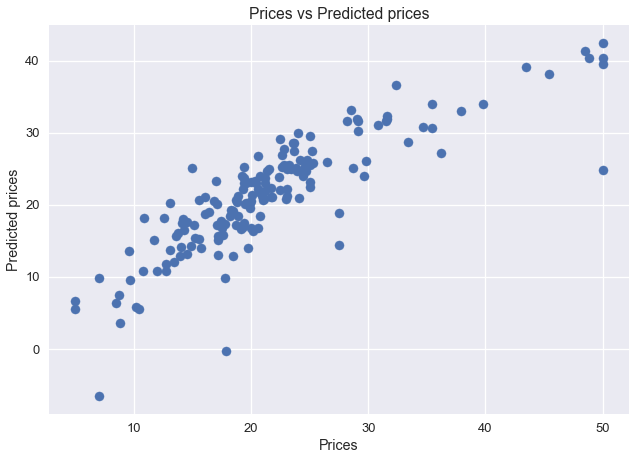

In [101]:
import sklearn.linear_model as lm

linear_clf = lm.LinearRegression()

# Fit your classifier
fit = linear_clf.fit(X_train, Y_train)

# Predict points from our test set
Y_pred_test = fit.predict(X_test)

# Plot predicted vs true prices
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

### Question 3

As shown from the scatter plot, our model is not perfect. Ideally, we would see a line of slope 1 from the points if our model was 100% accurate.

Now let's also compute our mean squared error. Fill out the function below and compute the MSE for our predictions on both the training data `X_train` and the test set `X_test`.

In [102]:
def mse(predicted_y, actual_y):
    return np.sum(((predicted_y-actual_y)**2))/len(actual_y)


Y_pred_train = fit.predict(X_train)

train_error = mse(Y_pred_train, Y_train)
test_error = mse(Y_pred_test, Y_test)
train_error,test_error

(22.983493731652878, 20.747143360308836)

In [103]:
_ = ok.grade('q03')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab11.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab11/backups/666Z0R
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Question 4

We have just executed a linear regression on our data. Can we get this predictor to be any better though? The following sections will go through cross-validation and some feature engineering in order to try and produce the best model with the least error.

Let's start by seeing what is the **single** best feature for predicting boston house prices. For each feature in the given features list, fit a Linear Regression model to the training set where just that feature is selected for and check its accuracy on the validation set. Use the `mse` function you defined above.

In [ ]:
features = boston_data.feature_names

# Your code to find the single best feature
...

best_feature, best_error

In [ ]:
_ = ok.grade('q04')
_ = ok.backup()

## K-Folds Cross Validation

We've so far been working with the generalized method of cross-validation where we split our data into a test and train set. Now let's try k-folds cross-validation to select the best subset of features for our model. Recall the approach looks something like:

<img src="cv.png" width=500px>

### Question 5

For the sake of this lab, we have a provided a list of feature subsets and will try to find out which subset produces the best model predictor. In future assignments (Project 2?!?!), you will be given the full feature set and use EDA and other techniques you've learned in this class to select your set of best features.

Here are the necessary steps to find your best linear predictor:

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get 4 splits on your training data. Note that `split` returns the indices of the data for that split.
2. For each split, select out the rows and columns based on the split indices and features.
3. Compute the MSE from your prediction.
4. Based on the set with that gave the smallest MSE, choose your best set of features.


In [ ]:
from sklearn.model_selection import KFold
feature_sets = [['TAX', 'INDUS', 'CRIM'], ['RM', 'LSTAT', 'PTRATIO'], ['RM', 'B', 'NOX'], ['TAX', 'LSTAT', 'DIS']]

kf = ...
splits = 

def compute_error(train_idx, valid_idx, features):
    '''
    Splits the original training data based on the passed in indices.
    Fits the data to the split's train set and returns the MSE 
    
    Args:
        train_idx (array): Indices of the split training data
        valid_idx (array): Indicies of the split validation data
        features (array): List of features (strings)

    Returns:
        Returns the MSE of predictions on the validation data
    '''
    return
    
# Your code to find the best feature set based on the error
...
        
best_feature_set = ...
best_feature_set

In [ ]:
_ = ok.grade('q05')
_ = ok.backup()

### Question 6
Finally, fit a linear classifier using your best feature set and predict housing prices for your original test set. Compute the final MSE.

In [ ]:
# Fit your classifier
...

# Predict points from our test set and calculate the mse
final_mse = ...
final_mse

In [ ]:
_ = ok.grade('q06')
_ = ok.backup()

Nice! You've used kfolds cross-validation to fit an accurate linear regression model to the dataset.

In the future, you'd probably want to use something like [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to automatically perform cross-validation, but it's instructive to do it yourself at least once.

In [ ]:
# Log into OkPy.
# You might need to change this to ok.auth(force=True) if you get an error
ok.auth(force=False)

## Submission

Run the cell below to run all the OkPy tests at once:

In [ ]:
import os
print("Running all tests...")
_ = ok.grade_all()

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [ ]:
_ = ok.submit()